In [1]:
import requests

In [2]:
# Build base URL
HOST = "https://api.census.gov/data"
year = '2010'
dataset = 'dec/sf1'
base_url = "/".join([HOST, year, dataset])
print(base_url)

https://api.census.gov/data/2010/dec/sf1


In [3]:
# Specify Census variables and other predicates
#get_vars = ['NAME','P013001','P037001']
get_vars = ['NAME','P005001','P005003','P005004','P005005','P005006','P005007','P005008','P005009','P005010']
predicates = {}
predicates["get"] = ",".join(get_vars)
#predicates["for"] = "state:*"
#predicates["for"] = "state:42"
predicates["for"] = "county:*"
#predicates["for"] = "zip code tabulation area (or part):*"
#predicates["for"] = "tract:*"
#predicates["in"] = "state:36"
print(predicates)

{'get': 'NAME,P005001,P005003,P005004,P005005,P005006,P005007,P005008,P005009,P005010', 'for': 'county:*'}


In [4]:
# Execute the request, examine text of response object
r = requests.get(base_url, params=predicates)
print(r.text)

[["NAME","P005001","P005003","P005004","P005005","P005006","P005007","P005008","P005009","P005010","state","county"],
["Sebastian County, Arkansas","125744","91585","7848","2186","5039","69","82","3490","15445","05","131"],
["Sevier County, Arkansas","17058","10416","717","324","62","2","19","298","5220","05","133"],
["Sharp County, Arkansas","17264","16399","91","164","49","2","4","265","290","05","135"],
["Stone County, Arkansas","12394","11912","11","82","45","3","3","181","157","05","137"],
["Union County, Arkansas","41639","25722","13674","127","196","11","18","431","1460","05","139"],
["Van Buren County, Arkansas","17295","16282","65","113","56","2","7","295","475","05","141"],
["Washington County, Arkansas","203065","150546","5828","2154","4372","4100","227","4380","31458","05","143"],
["White County, Arkansas","77076","69026","3033","425","411","30","43","1229","2879","05","145"],
["Yell County, Arkansas","22185","17020","288","127","278","2","7","233","4230","05","149"],
["Col

In [5]:
len(r.text)

310856

In [6]:
import pandas as pd

In [7]:
col_header = r.json()[0]
print(col_header)

['NAME', 'P005001', 'P005003', 'P005004', 'P005005', 'P005006', 'P005007', 'P005008', 'P005009', 'P005010', 'state', 'county']


In [8]:
df = pd.DataFrame(r.json()[1:], columns=col_header)
df.head()

,NAME,P005001,P005003,P005004,P005005,P005006,P005007,P005008,P005009,P005010,state,county
0,"Sebastian County, Arkansas",125744,91585,7848,2186,5039,69,82,3490,15445,05,131
1,"Sevier County, Arkansas",17058,10416,717,324,62,2,19,298,5220,05,133
2,"Sharp County, Arkansas",17264,16399,91,164,49,2,4,265,290,05,135
3,"Stone County, Arkansas",12394,11912,11,82,45,3,3,181,157,05,137
4,"Union County, Arkansas",41639,25722,13674,127,196,11,18,431,1460,05,139


In [9]:
print(df.iloc[:, 2:10].head())

  P005003 P005004 P005005 P005006 P005007 P005008 P005009 P005010
0   91585    7848    2186    5039      69      82    3490   15445
1   10416     717     324      62       2      19     298    5220
2   16399      91     164      49       2       4     265     290
3   11912      11      82      45       3       3     181     157
4   25722   13674     127     196      11      18     431    1460


In [10]:
df.iloc[:, 2:10] = df.iloc[:, 2:10].astype(float)

In [11]:
df['P005001'] = df['P005001'].astype(float)
df['P005003'] = df['P005003'].astype(float)
df['P005004'] = df['P005004'].astype(float)
df['P005005'] = df['P005005'].astype(float)
df['P005006'] = df['P005006'].astype(float)
df['P005007'] = df['P005007'].astype(float)
df['P005008'] = df['P005008'].astype(float)
df['P005009'] = df['P005009'].astype(float)
df['P005010'] = df['P005010'].astype(float)

In [12]:
df.dtypes

NAME        object
P005001    float64
P005003    float64
P005004    float64
P005005    float64
P005006    float64
P005007    float64
P005008    float64
P005009    float64
P005010    float64
state       object
county      object
dtype: object

In [13]:
df['Check_Total']=df['P005003']+df['P005004']+df['P005005']+df['P005006']+df['P005007']+df['P005008']+df['P005009']+df['P005010']

In [14]:
df[['P005001','Check_Total']].tail()

,P005001,Check_Total
3216,98736.0,98736.0
3217,4423.0,4423.0
3218,101633.0,101633.0
3219,9304.0,9304.0
3220,83686.0,83686.0


In [15]:
df.dtypes

NAME            object
P005001        float64
P005003        float64
P005004        float64
P005005        float64
P005006        float64
P005007        float64
P005008        float64
P005009        float64
P005010        float64
state           object
county          object
Check_Total    float64
dtype: object

In [16]:
df['White']=(100*df['P005003']/df['P005001']).round(2)
df['Black']=(100*df['P005004']/df['P005001']).round(2)
df['Native']=(100*df['P005005']/df['P005001']).round(2)
df['Asian']=(100*df['P005006']/df['P005001']).round(2)
df['Pacific']=(100*df['P005007']/df['P005001']).round(2)
df['Mixed']=(100*df['P005008']/df['P005001']).round(2)
df['Hispanic']=(100*df['P005010']/df['P005001']).round(2)

In [17]:
df.head()

,NAME,P005001,P005003,P005004,P005005,P005006,P005007,P005008,P005009,P005010,state,county,Check_Total,White,Black,Native,Asian,Pacific,Mixed,Hispanic
0,"Sebastian County, Arkansas",125744.0,91585.0,7848.0,2186.0,5039.0,69.0,82.0,3490.0,15445.0,05,131,125744.0,72.83,6.24,1.74,4.01,0.05,0.07,12.28
1,"Sevier County, Arkansas",17058.0,10416.0,717.0,324.0,62.0,2.0,19.0,298.0,5220.0,05,133,17058.0,61.06,4.20,1.90,0.36,0.01,0.11,30.60
2,"Sharp County, Arkansas",17264.0,16399.0,91.0,164.0,49.0,2.0,4.0,265.0,290.0,05,135,17264.0,94.99,0.53,0.95,0.28,0.01,0.02,1.68
3,"Stone County, Arkansas",12394.0,11912.0,11.0,82.0,45.0,3.0,3.0,181.0,157.0,05,137,12394.0,96.11,0.09,0.66,0.36,0.02,0.02,1.27
4,"Union County, Arkansas",41639.0,25722.0,13674.0,127.0,196.0,11.0,18.0,431.0,1460.0,05,139,41639.0,61.77,32.84,0.31,0.47,0.03,0.04,3.51


In [18]:
df['Hispanic'].mean()

10.480797888854394

In [19]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Mixed')

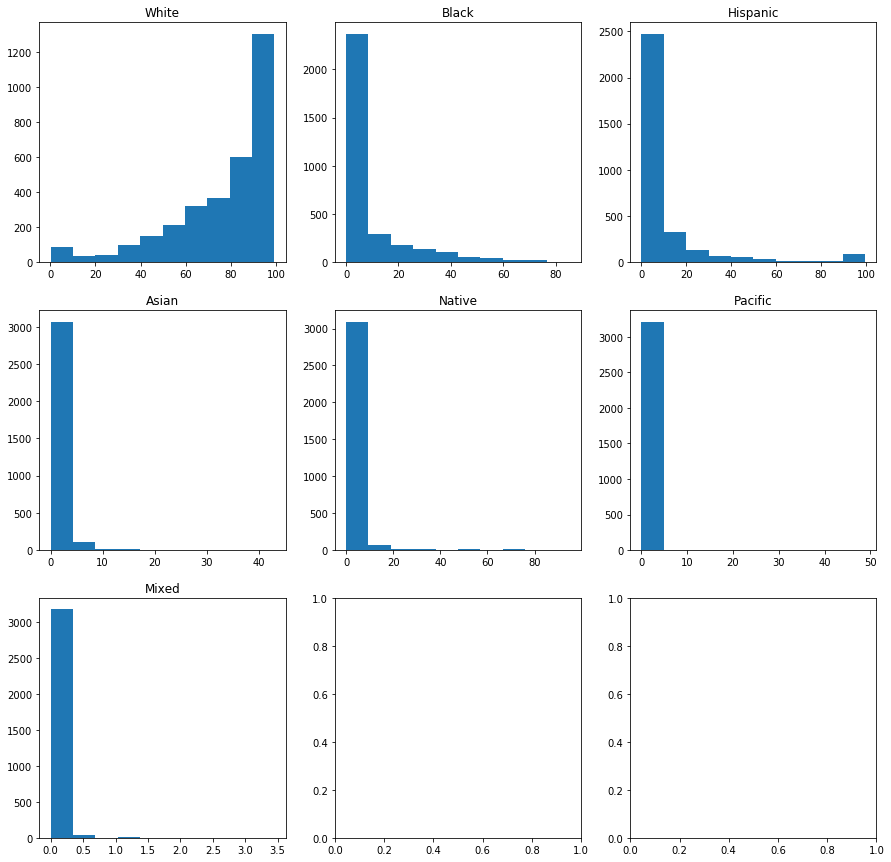

In [20]:
fig, axs = plt.subplots(3,3,figsize=(15,15))
axs[0,0].hist(df['White'])
axs[0,0].set_title('White')
axs[0,1].hist(df['Black'])
axs[0,1].set_title('Black')
axs[0,2].hist(df['Hispanic'])
axs[0,2].set_title('Hispanic')
axs[1,0].hist(df['Asian'])
axs[1,0].set_title('Asian')
axs[1,1].hist(df['Native'])
axs[1,1].set_title('Native')
axs[1,2].hist(df['Pacific'])
axs[1,2].set_title('Pacific')
axs[2,0].hist(df['Mixed'])
axs[2,0].set_title('Mixed')

In [21]:
df['White'].mean()

76.41726171996274

In [22]:
df.head()

,NAME,P005001,P005003,P005004,P005005,P005006,P005007,P005008,P005009,P005010,state,county,Check_Total,White,Black,Native,Asian,Pacific,Mixed,Hispanic
0,"Sebastian County, Arkansas",125744.0,91585.0,7848.0,2186.0,5039.0,69.0,82.0,3490.0,15445.0,05,131,125744.0,72.83,6.24,1.74,4.01,0.05,0.07,12.28
1,"Sevier County, Arkansas",17058.0,10416.0,717.0,324.0,62.0,2.0,19.0,298.0,5220.0,05,133,17058.0,61.06,4.20,1.90,0.36,0.01,0.11,30.60
2,"Sharp County, Arkansas",17264.0,16399.0,91.0,164.0,49.0,2.0,4.0,265.0,290.0,05,135,17264.0,94.99,0.53,0.95,0.28,0.01,0.02,1.68
3,"Stone County, Arkansas",12394.0,11912.0,11.0,82.0,45.0,3.0,3.0,181.0,157.0,05,137,12394.0,96.11,0.09,0.66,0.36,0.02,0.02,1.27
4,"Union County, Arkansas",41639.0,25722.0,13674.0,127.0,196.0,11.0,18.0,431.0,1460.0,05,139,41639.0,61.77,32.84,0.31,0.47,0.03,0.04,3.51


In [23]:
df.to_pickle("output/us_race_census.pkl")  # where to save it, usually as a .pkl